In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kstest

In [2]:
df = pd.read_csv('результаты А_B - cookie_cats 2.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [4]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [7]:
df.version.unique() # смотрим уникальные значения в столбце version

array(['gate_30', 'gate_40'], dtype=object)

Посмотрим на выбросы в столбце sum_gamerounds

<Axes: xlabel='sum_gamerounds', ylabel='version'>

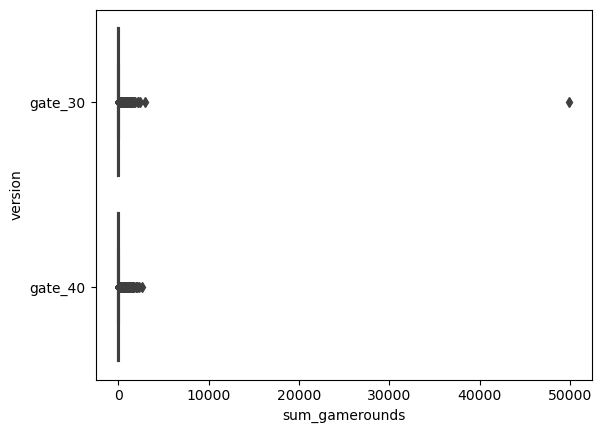

In [10]:
sns.boxplot(data = df[df['sum_gamerounds'] > 0], x = 'sum_gamerounds', y = 'version')

Выведем первые 10 строк столбца sum_gameround в порядке убывания

In [11]:
df.nlargest(10, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1
46344,5133952,gate_30,2251,1,1
87007,9640085,gate_30,2156,1,1
36933,4090246,gate_40,2124,1,1
88328,9791599,gate_40,2063,1,1
6536,725080,gate_40,2015,1,1


Удалим выброс из столбца

In [14]:
df1 = df[df['sum_gamerounds'] < 3000]
df1.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [28]:
A = df1[df1['version'] == 'gate_30'].count() # Обозначили контрольную и тествоую версии 
B = df1[df1['version'] == 'gate_40'].count()
df1['version'].value_counts()

gate_40    45489
gate_30    44699
Name: version, dtype: int64

Проверим на нормальность с помощью теста Колмогорова-Смирнова

In [30]:
alpha = 0.05
kstest(df1['sum_gamerounds'], 'norm')

KstestResult(statistic=0.8715595323087064, pvalue=0.0, statistic_location=2, statistic_sign=-1)

Так как pvalue < alpha, распределение не нормальное.

Text(0.5, 1.0, 'Number of game rounds players on the first week')

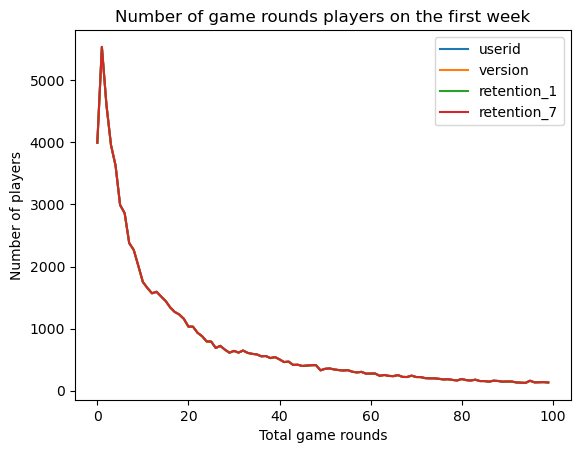

In [32]:
plot_df = df.groupby('sum_gamerounds').count()

ax = plot_df[:100].plot()
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
ax.set_title('Number of game rounds players on the first week')  # игровое время пользователей

In [33]:
oneday = df.retention_1.sum()/df.retention_1.count()
print(str(oneday*100)+'%') # Удержание в течении одного дня

44.52095044850259%


In [34]:
oneday = df.retention_1.groupby(df.version).sum()/df.retention_1.groupby(df.version).count()
print(oneday*100) # Удержание в течении одного дня для каждой из групп

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64


Пока результы примернот одинаковые и четкого ответа дать невозможно.
используем BootStrap

In [36]:
boot_1d = []
for i in range(500):
  boot_mean = df.retention_1.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
print(boot_1d)

version       gate_30   gate_40
retention_1  0.444726  0.445956
retention_1  0.444266  0.441226
retention_1  0.447695  0.441671
retention_1  0.447790  0.440474
retention_1  0.449471  0.440416
...               ...       ...
retention_1  0.448068  0.444496
retention_1  0.446367  0.442156
retention_1  0.446922  0.439450
retention_1  0.452611  0.437043
retention_1  0.449128  0.440576

[500 rows x 2 columns]


Text(0.5, 0, 'The average of 1-day retention')

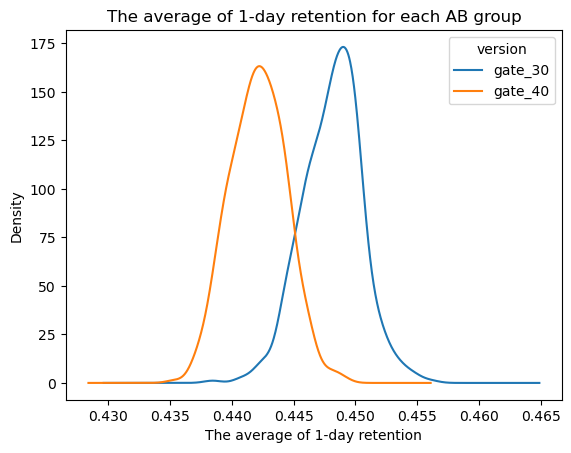

In [37]:
ax = boot_1d.plot.kde()
ax.set_title('The average of 1-day retention for each AB group')
ax.set_xlabel('The average of 1-day retention')

Text(0.5, 1.0, 'Zooming % difference')

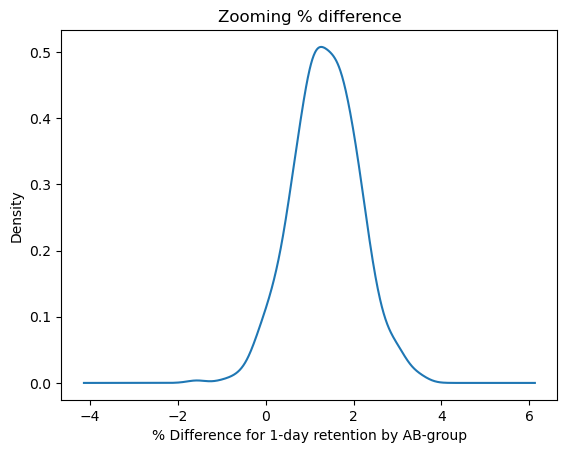

In [39]:
boot_1d['difference'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40']*100

ax = boot_1d['difference'].plot.kde()
ax.set_xlabel('% Difference for 1-day retention by AB-group')
ax.set_title('Zooming % difference') # Увеличиваем разницу в течении одного дня

Из графика видно, что наиболее вероятная разница 1-2% в пользу ворот на 30 уровне.

In [41]:
prob = (boot_1d['difference'] > 0).sum() / len(boot_1d['difference'])
print(str(prob*100)+'%') # процент случаев когда разница больше нуля

96.2%


In [42]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Прцент удержания в обоих случаях выше у gate_30

In [43]:
boot_7d = []
for i in range(500):
  boot_mean = df.retention_7.sample(frac=1, replace=True).groupby(df.version).mean()
  boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

version       gate_30   gate_40
retention_7  0.188287  0.182652
retention_7  0.189970  0.184076
retention_7  0.189798  0.181908
retention_7  0.191265  0.179809
retention_7  0.190303  0.184579


0.998


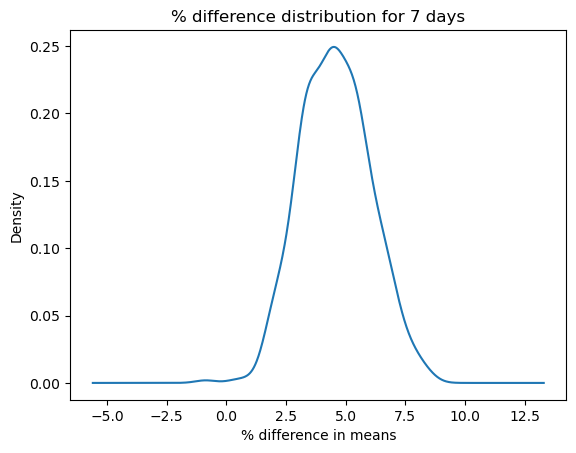

In [44]:
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% difference in means')
ax.set_title('% difference distribution for 7 days')

prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

print(prob)

In [45]:
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(str(prob*100)+'%')

99.8%


Удержание в течении 7 дней выше для gate_30. Значит для удержания аудитории не рекомендуется менять gate_30 на gate_40.